# Data Analytics and Data Driven Decision 2024


## The final challenge

Your startup company **Connect-them-all** wants to deploy a backbone network to 
provide high-speed Internet connections in Abruzzo. 

Your Chief Financial Officer has reserved a budget of 25,000 Euro for the realization of the network.
As data guru, you are in charge of:

1. **Estimate the sales in each city contained in the dataset** `abruzzo_cities.csv`. 

    To this aim, 
    the marketing department has provided you with a dataset `italian_cities.csv` that reports the population (in tens of thousand) and the number of contracts sold in 50 Italian cities last year. Using this dataset, you have to:
    
    1. Train a regression model that, for a given city, estimates the number of contracts (**target**) based on city's population (**feature**). 
    2. Run the trained model to predict the contract sales for the 32 main Abruzzo cities in `abruzzo_cities.csv`
    
    
2. **Design the most profitable backbone network**, knowing that:

    1. The activation cost of the link between city $i$ and $j$ is $100 *  \text{distance} (i,j)$ Euro, where  $\text{distance} (i,j)$ is reported in the dataset `distances.csv`. The total network cost is the sum of the costs of the activated links.
    
    2. Each connected city will return a revenue of $10 * \text{estimated contract sales}$ Euro
    
    3. The network can be rooted either in Pescara or in Avezzano



In [1]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import numpy as np
import networkx as nx
import gurobipy as gb

We load the datasets.

In [2]:
italian_cities_df = pd.read_csv('italian_cities.csv')
abruzzo_cities_df = pd.read_csv('abruzzo_cities.csv', index_col="city", sep = ",")
distances_df = pd.read_csv('distances.csv', index_col="city", sep = ";")

We perform a reshaping of the loaded datasets, in particular we converted the column vectors into 2-dimensional arrays with a single column. This is important because many `Scikit-Learn` functions require input data to be 2-dimensional arrays, even if they have only one feature.

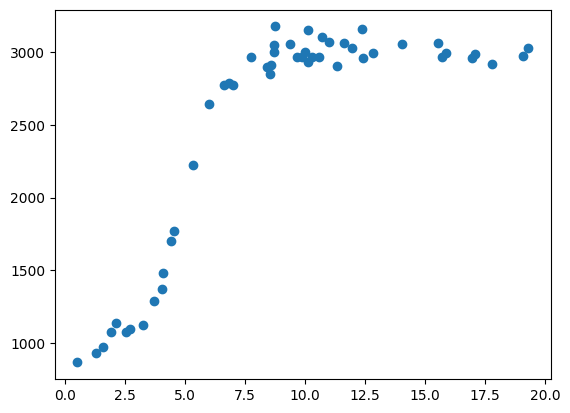

In [3]:
X = italian_cities_df['population'].values.reshape(-1, 1)
y = italian_cities_df['contracts'].values.reshape(-1, 1)

plt.scatter(X, y)

Now we are ready to train the regressor. Note that we decided to split the `italian_cities.csv` so that the **80% of data are used for training purpose, the remaining 20% for testing**.

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [5]:
poly_object = PolynomialFeatures(degree=4)
X_train_poly = poly_object.fit_transform(X_train)

LinearRegression_model = LinearRegression(fit_intercept=True)
LinearRegression_model.fit(X_train_poly, y_train)

y_predicted = LinearRegression_model.predict(X_train_poly)

X_test_poly = poly_object.fit_transform(X_test)

y_test_predicted = LinearRegression_model.predict(X_test_poly)


The **R square** score will give us an idea of how the regression performed. After that we plot the results.

In [6]:
r2_train = r2_score(y_train, y_predicted)
print(r2_train)

0.9632627965928597


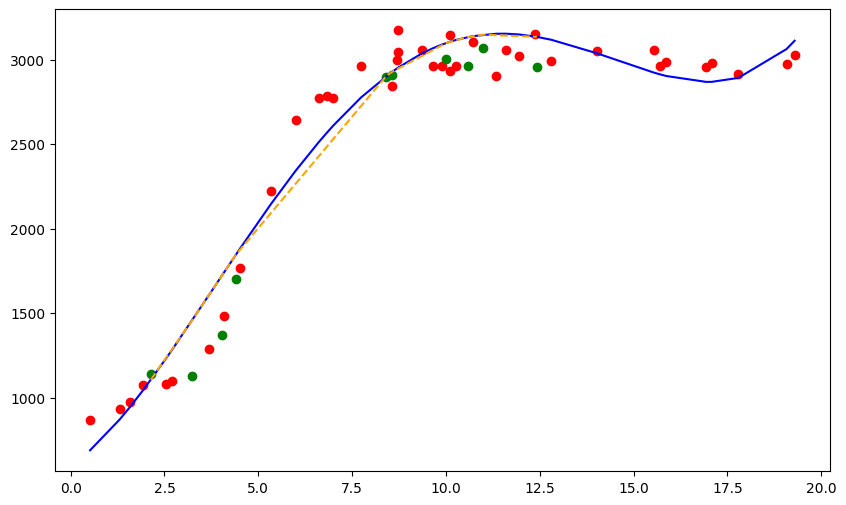

In [7]:
plt.figure(figsize=(10, 6))

# In red the training data
plt.scatter(X_train, y_train, color='red', label='Training data')

# In blue the prediction for the training set
plt.plot(sorted(X_train), y_predicted[np.argsort(X_train.ravel())], color='blue', label='Model fit (training)')

# In green the tessting data
plt.scatter(X_test, y_test, color='green', label='Test data')

# In orange the predicition for the testing set
plt.plot(sorted(X_test), y_test_predicted[np.argsort(X_test.ravel())], color='orange', linestyle='--', label='Model fit (test)')

In [8]:
abruzzo_cities_df['predicted_contracts'] = LinearRegression_model.predict(poly_object.fit_transform(abruzzo_cities_df['population'].values.reshape(-1, 1)))

results_dict = abruzzo_cities_df['predicted_contracts'].to_dict()

In [9]:
print(results_dict)

{'Pescara': 3153.2115821467582, 'LAquila': 2534.5886945110005, 'Teramo': 2174.452313092196, 'Chieti': 2087.0122842294886, 'Montesilvano': 2053.1250639887057, 'Avezzano': 1737.1329909021574, 'Vasto': 1670.521405674621, 'Lanciano': 1576.1255538008863, 'RosetodegliAbruzzi': 1216.8389981645141, 'Sulmona': 1195.9152462119168, 'FrancavillaalMare': 1181.5553956257245, 'Ortona': 1169.3781762641038, 'Giulianova': 1162.3635369739732, 'SanSalvo': 1031.1783018606684, 'Spoltore': 1022.958968260745, 'Martinsicuro': 935.7616183956538, 'Silvi': 933.4845252838815, 'Pineto': 912.5506337915903, 'CittaSantAngelo': 905.7758641528617, 'SanGiovanniTeatino': 862.4934213890979, 'Penne': 862.0812014990793, 'AlbaAdriatica': 832.8517109784411, 'Atri': 821.6073978195964, 'Celano': 814.6319338630603, 'Atessa': 812.9947238596574, 'Cepagatti': 805.413409356501, 'Tortoreto': 805.2441269038029, 'SantEgidioallaVibrata': 786.7494764420478, 'Guardiagrele': 779.6784608563325, 'MoscianoSantAngelo': 776.9718726257975, 'Piane

In [10]:
abruzzo_cities_df.index

Index(['Pescara', 'LAquila', 'Teramo', 'Chieti', 'Montesilvano', 'Avezzano',
       'Vasto', 'Lanciano', 'RosetodegliAbruzzi', 'Sulmona',
       'FrancavillaalMare', 'Ortona', 'Giulianova', 'SanSalvo', 'Spoltore',
       'Martinsicuro', 'Silvi', 'Pineto', 'CittaSantAngelo',
       'SanGiovanniTeatino', 'Penne', 'AlbaAdriatica', 'Atri', 'Celano',
       'Atessa', 'Cepagatti', 'Tortoreto', 'SantEgidioallaVibrata',
       'Guardiagrele', 'MoscianoSantAngelo', 'Pianella', 'MontorioalVomano'],
      dtype='object', name='city')

In [11]:
G = nx.complete_graph(abruzzo_cities_df.index)

In [12]:
nx.set_node_attributes(G, abruzzo_cities_df['longitude'], 'x')
nx.set_node_attributes(G, abruzzo_cities_df['latitude'], 'y')
nx.set_node_attributes(G, abruzzo_cities_df['population']*10000, 'population')
nx.set_node_attributes(G, results_dict, 'predicted_sale')

In [13]:
for i in G.nodes():
    for j in G.nodes():
        if i != j:
            G[i][j]['costo_att'] = distances_df.loc[i, j] * 100

In [14]:
G.edges(data = True)

EdgeDataView([('Pescara', 'LAquila', {'costo_att': 6700}), ('Pescara', 'Teramo', {'costo_att': 4600}), ('Pescara', 'Chieti', {'costo_att': 1400}), ('Pescara', 'Montesilvano', {'costo_att': 600}), ('Pescara', 'Avezzano', {'costo_att': 8000}), ('Pescara', 'Vasto', {'costo_att': 5600}), ('Pescara', 'Lanciano', {'costo_att': 3000}), ('Pescara', 'RosetodegliAbruzzi', {'costo_att': 2700}), ('Pescara', 'Sulmona', {'costo_att': 5000}), ('Pescara', 'FrancavillaalMare', {'costo_att': 800}), ('Pescara', 'Ortona', {'costo_att': 2100}), ('Pescara', 'Giulianova', {'costo_att': 3700}), ('Pescara', 'SanSalvo', {'costo_att': 6300}), ('Pescara', 'Spoltore', {'costo_att': 700}), ('Pescara', 'Martinsicuro', {'costo_att': 5100}), ('Pescara', 'Silvi', {'costo_att': 1100}), ('Pescara', 'Pineto', {'costo_att': 1900}), ('Pescara', 'CittaSantAngelo', {'costo_att': 1300}), ('Pescara', 'SanGiovanniTeatino', {'costo_att': 600}), ('Pescara', 'Penne', {'costo_att': 2200}), ('Pescara', 'AlbaAdriatica', {'costo_att': 

In [15]:
G.nodes(data = True)

NodeDataView({'Pescara': {'x': 14.2059269, 'y': 42.469613, 'population': 117166.0, 'predicted_sale': 3153.2115821467582}, 'LAquila': {'x': 13.3979672, 'y': 42.3489203, 'population': 66964.0, 'predicted_sale': 2534.5886945110005}, 'Teramo': {'x': 13.6983524, 'y': 42.6612893, 'population': 54294.0, 'predicted_sale': 2174.452313092196}, 'Chieti': {'x': 14.1659738, 'y': 42.3446529, 'population': 51484.0, 'predicted_sale': 2087.0122842294886}, 'Montesilvano': {'x': 14.1516203, 'y': 42.5136032, 'population': 50413.0, 'predicted_sale': 2053.1250639887057}, 'Avezzano': {'x': 13.4265048, 'y': 42.0347963, 'population': 40744.0, 'predicted_sale': 1737.1329909021574}, 'Vasto': {'x': 14.705923, 'y': 42.12434, 'population': 38747.0, 'predicted_sale': 1670.521405674621}, 'Lanciano': {'x': 14.3907794, 'y': 42.2305316, 'population': 35921.0, 'predicted_sale': 1576.1255538008863}, 'RosetodegliAbruzzi': {'x': 14.0144636, 'y': 42.677577, 'population': 24940.000000000004, 'predicted_sale': 1216.83899816451

In [16]:
def DrawInitG(G, withedges=False):
    
    plt.figure(figsize=args.figsize)
    
    pos = {i:(G.nodes[i]['x'], G.nodes[i]['y']) for i in G.nodes()}
    
    nx.draw_networkx_nodes(G, 
                           pos=pos, 
                           node_shape='o', 
                           node_size=600,
                           node_color='red')
    
    nx.draw_networkx_labels(G, pos=pos, font_color='w', font_size=12)
    
    if withedges:
        nx.draw_networkx_edges(G,pos=pos, alpha=1.0)
        labels = {(i,j):G.get_edge_data(i,j,'costo_att').get('costo_att') for i,j in G.edges()}
        nx.draw_networkx_edge_labels(G, pos=pos, edge_labels=labels)
    
    plt.axis('off')
    plt.show()
def DrawSol(G, x):
    
    plt.figure(figsize=args.figsize)
    
    pos = {i:(G.nodes[i]['x'], G.nodes[i]['y']) for i in G.nodes()}

    
    nx.draw_networkx_nodes(G, 
                           pos=pos, 
                           node_shape='o', 
                           node_size=600,
                           node_color='red',
                           label=[G.nodes()])
    
    nx.draw_networkx_labels(G, pos=pos, font_color='w', font_size=12)
    
    for u,v in G.edges():
        if x[u,v].x > 0.01 and x[u,v].x < 0.9:
            nx.draw_networkx_edges(G, pos=pos,
                                   edgelist=[(u,v)],
                                   edge_color='r')
            
            nx.draw_networkx_edge_labels(G, pos=pos,
                                         edge_labels={(u,v):'{:.2f}'.format(x[u,v].x)})
        
        if x[u,v].x > 0.9:
            nx.draw_networkx_edges(G, pos=pos,
                                   edgelist=[(u,v)],
                                   edge_color='k')
        

    
    #edges_in_sol = [(u,v)  for u,v in G.edges() if x[u,v].x > 0.1]

    
    plt.axis('off')
    plt.show()
    
class args:
    filename = None
    figsize = 30,60
    scale = 40

In [17]:
D = G.to_directed()

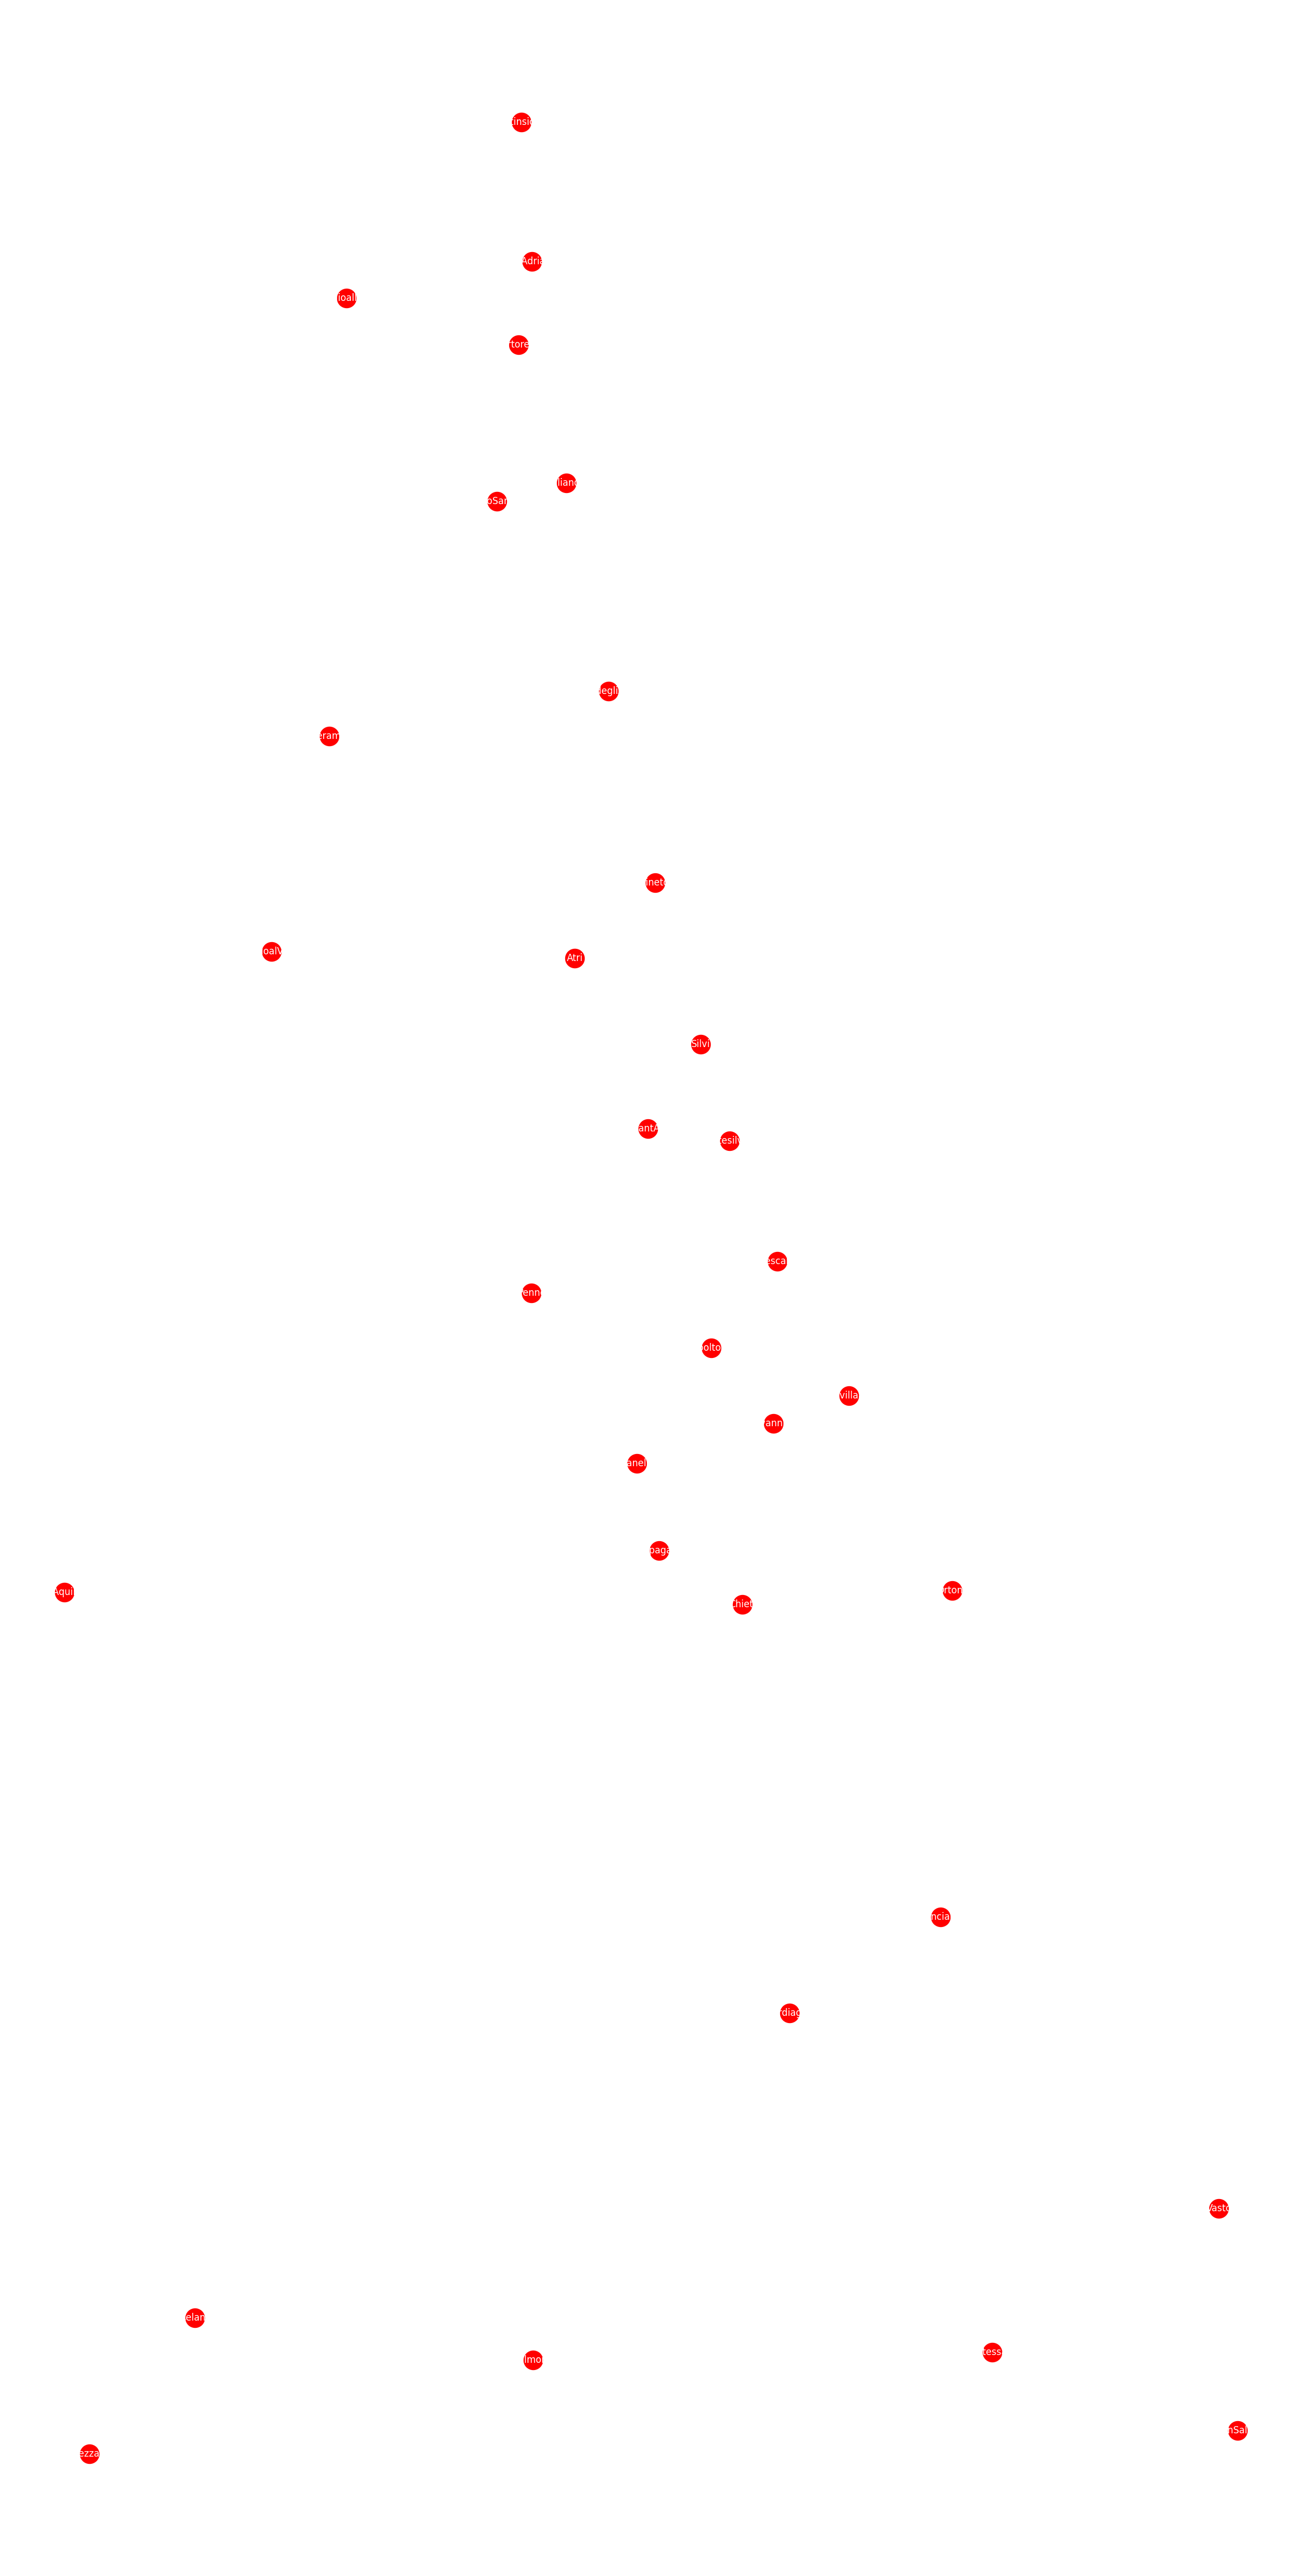

In [18]:
root = 'Avezzano'

pos = {i:(G.nodes[i]['x'] * args.scale,G.nodes[i]['y'] * args.scale) for i in G.nodes()}
DrawInitG(G)

In [19]:
pcst = gb.Model()


Set parameter WLSAccessID
Set parameter WLSSecret
Set parameter LicenseID to value 2487592
Academic license 2487592 - for non-commercial use only - registered to lo___@student.univaq.it


In [20]:
#
# Variables definition
#


x = pcst.addVars(D.edges(), vtype=gb.GRB.BINARY, \
                 obj = [- D[i][j]['costo_att'] for i,j in D.edges()], \
                 name = 'x')

y = pcst.addVars (G.nodes(), vtype = gb.GRB.BINARY, \
                  obj = [G.nodes[i]['predicted_sale']*10 for i in G.nodes()],\
                 name = 'y')

u = pcst.addVars (G.nodes(), vtype = gb.GRB.CONTINUOUS, 
                  lb = 0.0, ub = G.number_of_nodes(),\
                 name = 'u')


pcst.ModelSense = gb.GRB.MAXIMIZE

In [21]:
pcst.write('pcst.lp')

In [22]:
#
# Root is in the solution
#

pcst.addConstr(y[root] == 1, name = 'Fix')

pcst.update()

In [23]:
#
# Each node has exactly one incoming arc
#

pcst.addConstrs((x.sum('*',j) == y[j] for j in G.nodes() if j != root), name='Node')

pcst.update()

In [24]:
pcst.write('pcst.lp')

In [25]:
#
# Precedence constraints (MTZ constraints)
#

pcst.addConstrs(((G.number_of_nodes() +  1) * x[i,j] + u[i] - u[j] 
                 <= G.number_of_nodes() for i,j in D.edges()),
                name = 'MTZ')

pcst.update()

In [26]:
pcst.write('pcst.lp')

In [27]:
#
# Connectivity constraints
#

pcst.addConstrs((x[j,k] <= y[j] for j in G.nodes() \
                 if j != root for k in D.neighbors(j)), name = 'Connect')
pcst.update() 


In [28]:
pcst.write('pcst.lp')

In [29]:
pcst.optimize()

Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (linux64 - "Ubuntu 22.04.3 LTS")

CPU model: AMD Ryzen 7 7730U with Radeon Graphics, instruction set [SSE2|AVX|AVX2]
Thread count: 8 physical cores, 16 logical processors, using up to 16 threads

Academic license 2487592 - for non-commercial use only - registered to lo___@student.univaq.it
Optimize a model with 1985 rows, 1056 columns and 5891 nonzeros
Model fingerprint: 0xc9dcf2c1
Variable types: 32 continuous, 1024 integer (1024 binary)
Coefficient statistics:
  Matrix range     [1e+00, 3e+01]
  Objective range  [3e+02, 3e+04]
  Bounds range     [1e+00, 3e+01]
  RHS range        [1e+00, 3e+01]
Found heuristic solution: objective 17371.329909
Presolve removed 63 rows and 33 columns
Presolve time: 0.01s
Presolved: 1922 rows, 1023 columns, 5704 nonzeros
Variable types: 31 continuous, 992 integer (992 binary)

Root relaxation: objective 3.620951e+05, 63 iterations, 0.00 seconds (0.00 work units)

    Nodes    |    Current Node    |     Obj

In [30]:
totalcost = 0

for i,j in D.edges():
        if x[i,j].x > 0.1:
            print (x[i,j])
            totalcost += D[i][j]['costo_att']

print ("Total cost", totalcost)

<gurobi.Var x[Pescara,SanGiovanniTeatino] (value 1.0)>
<gurobi.Var x[LAquila,MontorioalVomano] (value 1.0)>
<gurobi.Var x[Teramo,SantEgidioallaVibrata] (value 1.0)>
<gurobi.Var x[Chieti,Cepagatti] (value 1.0)>
<gurobi.Var x[Montesilvano,Pescara] (value 1.0)>
<gurobi.Var x[Avezzano,Celano] (value 1.0)>
<gurobi.Var x[Vasto,SanSalvo] (value 1.0)>
<gurobi.Var x[Lanciano,Atessa] (value 1.0)>
<gurobi.Var x[Lanciano,Guardiagrele] (value 1.0)>
<gurobi.Var x[RosetodegliAbruzzi,Pineto] (value 1.0)>
<gurobi.Var x[FrancavillaalMare,Ortona] (value 1.0)>
<gurobi.Var x[Ortona,Lanciano] (value 1.0)>
<gurobi.Var x[Giulianova,RosetodegliAbruzzi] (value 1.0)>
<gurobi.Var x[Silvi,Montesilvano] (value 1.0)>
<gurobi.Var x[Silvi,CittaSantAngelo] (value 1.0)>
<gurobi.Var x[Pineto,Silvi] (value 1.0)>
<gurobi.Var x[Pineto,Atri] (value 1.0)>
<gurobi.Var x[SanGiovanniTeatino,Chieti] (value 1.0)>
<gurobi.Var x[SanGiovanniTeatino,FrancavillaalMare] (value 1.0)>
<gurobi.Var x[SanGiovanniTeatino,Spoltore] (value 1.0)

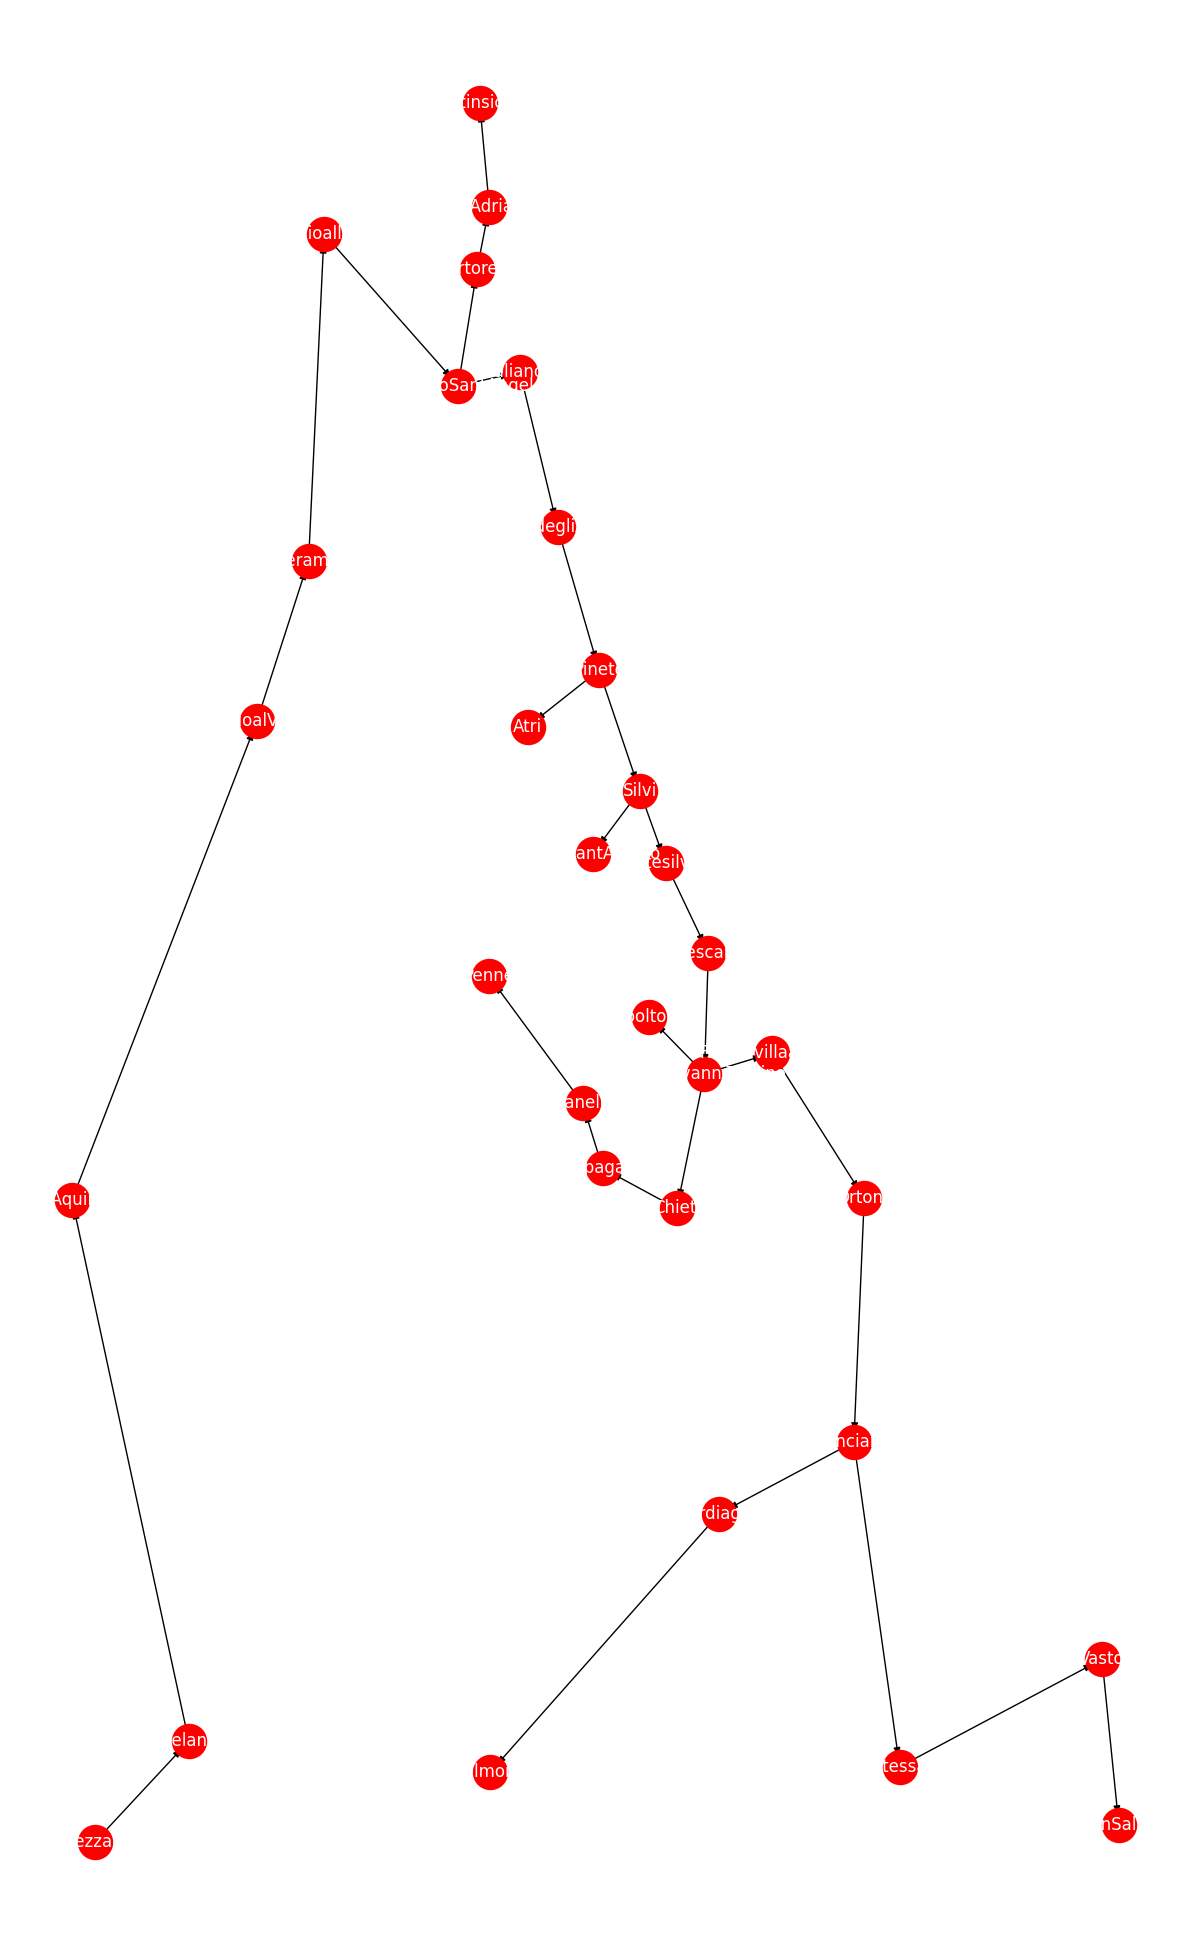

In [31]:
args.figsize = (15,25)

DrawSol(D,x)




In [32]:
budget = 25000

costs ={(i,j): D[i][j]['costo_att'] for (i,j) in D.edges()}

In [33]:
pcst.addConstr(x.prod(costs) <= budget, 'Budget')

pcst.update() 

pcst.write('pcst_budget.lp')

In [34]:
pcst.reset()
pcst.optimize()

Discarded solution information
Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (linux64 - "Ubuntu 22.04.3 LTS")

CPU model: AMD Ryzen 7 7730U with Radeon Graphics, instruction set [SSE2|AVX|AVX2]
Thread count: 8 physical cores, 16 logical processors, using up to 16 threads

Academic license 2487592 - for non-commercial use only - registered to lo___@student.univaq.it
Optimize a model with 1986 rows, 1056 columns and 6883 nonzeros
Model fingerprint: 0xa0bdc147
Variable types: 32 continuous, 1024 integer (1024 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+04]
  Objective range  [3e+02, 3e+04]
  Bounds range     [1e+00, 3e+01]
  RHS range        [1e+00, 2e+04]
Found heuristic solution: objective 17371.329909
Presolve removed 63 rows and 33 columns
Presolve time: 0.02s
Presolved: 1923 rows, 1023 columns, 6665 nonzeros
Variable types: 31 continuous, 992 integer (992 binary)

Root relaxation: objective 3.476934e+05, 64 iterations, 0.00 seconds (0.00 work units)

Interrupt re

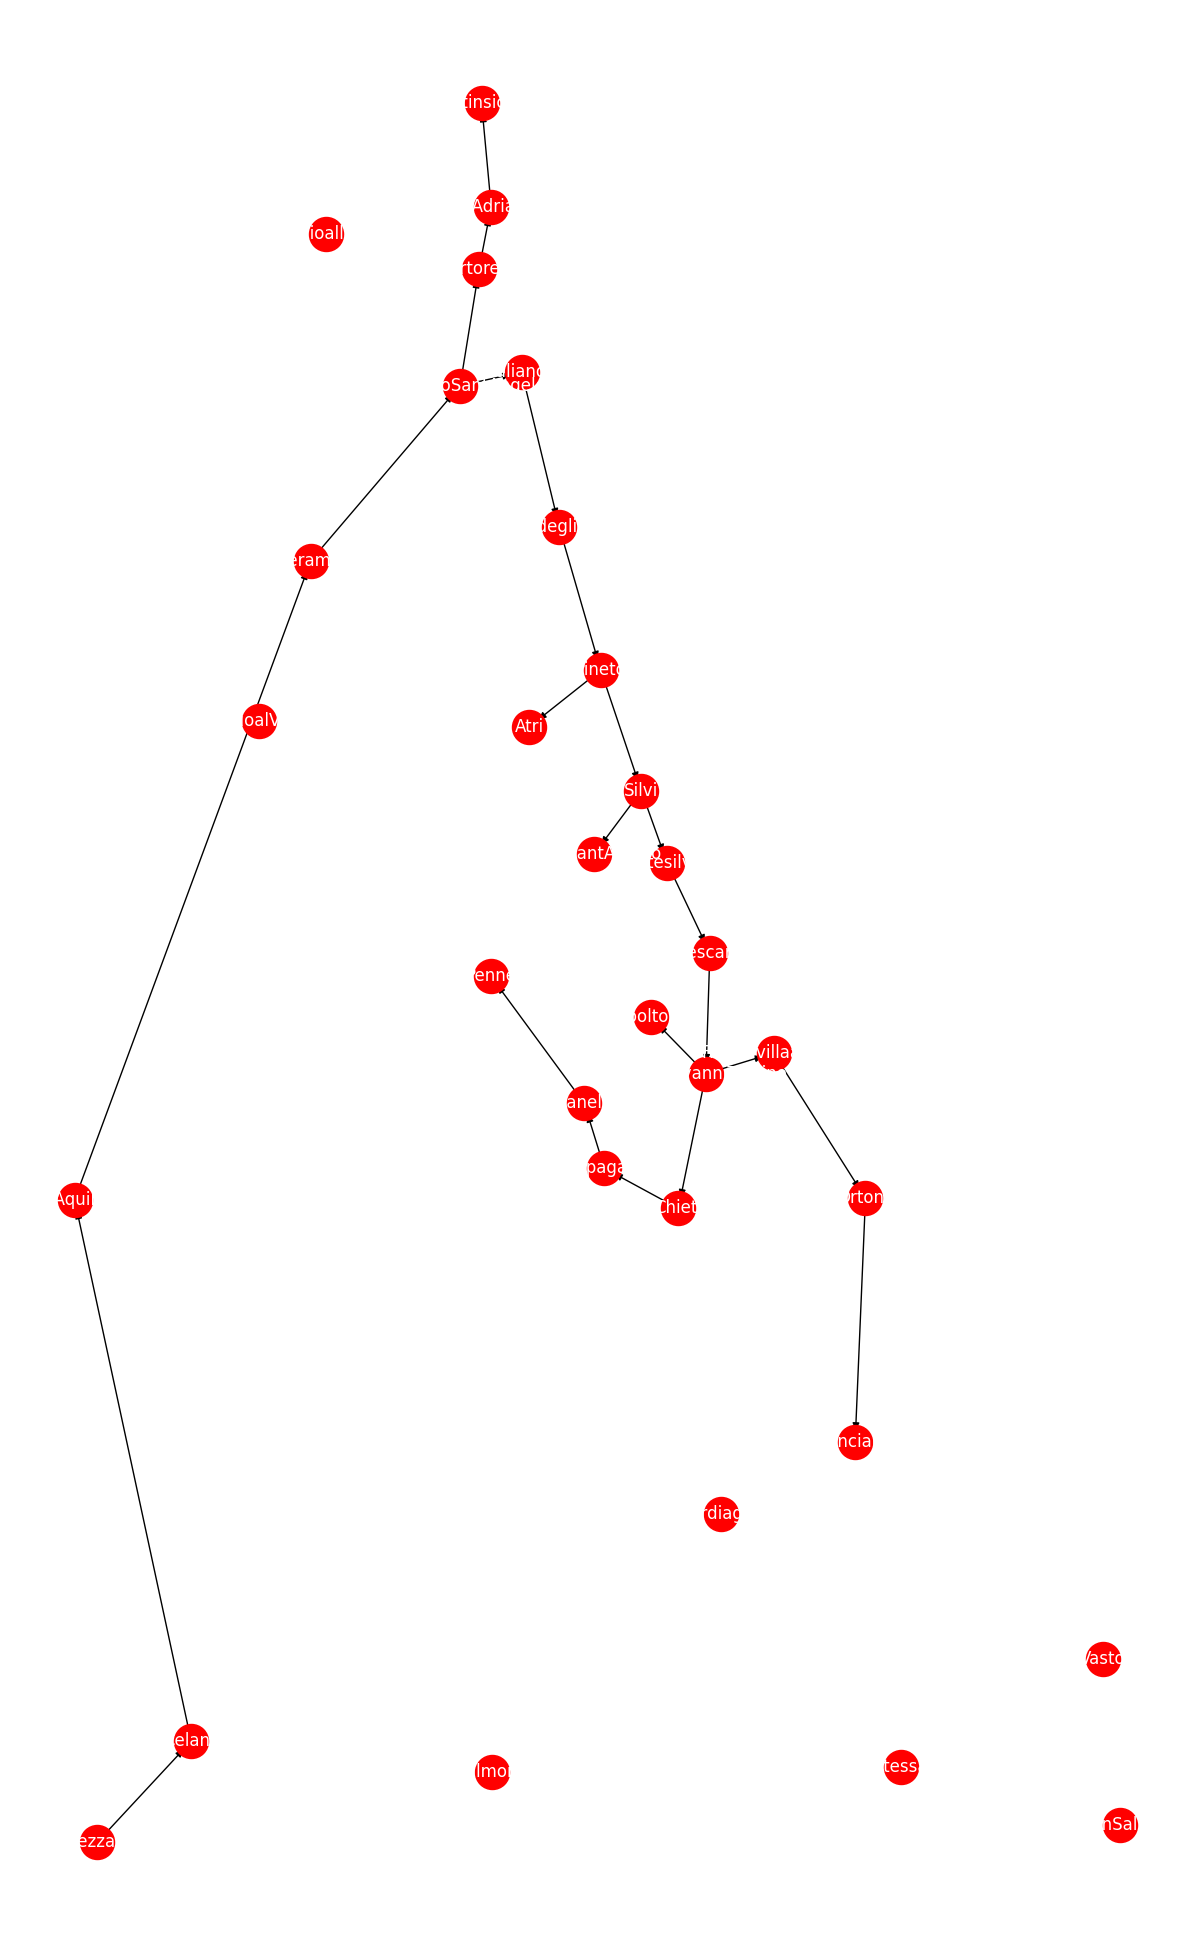

In [35]:
DrawSol(D,x)


# final sol: 
2.966588427775e+05